## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [9]:
df = pd.read_csv('/content/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [22]:
df.head(8)#Allows you to view the firts n rows, if n is not specified, default=5

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
5,2008-08-01 00:00:00,delphi,13
6,2008-08-01 00:00:00,java,222
7,2008-08-01 00:00:00,javascript,161


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
df.shape

(2649, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [13]:
df.count()

DATE     2649
TAG      2649
POSTS    2649
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [26]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,44538
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,405003
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1617795
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,808507
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52033
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,73265
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1917267
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2529034
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68142


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [27]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,191,191
c,191,191
c#,192,192
c++,191,191
delphi,191,191
go,176,176
java,191,191
javascript,191,191
perl,191,191


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [33]:
type(df.DATE[1])

str

In [35]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [36]:
#Convert the entire column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [38]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [40]:
reshaped_df.shape

(192, 14)

In [41]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [42]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1147.0,722.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [44]:
reshaped_df = reshaped_df.fillna(0)

In [45]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1147.0,722.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [46]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [47]:
import matplotlib.pyplot as plt

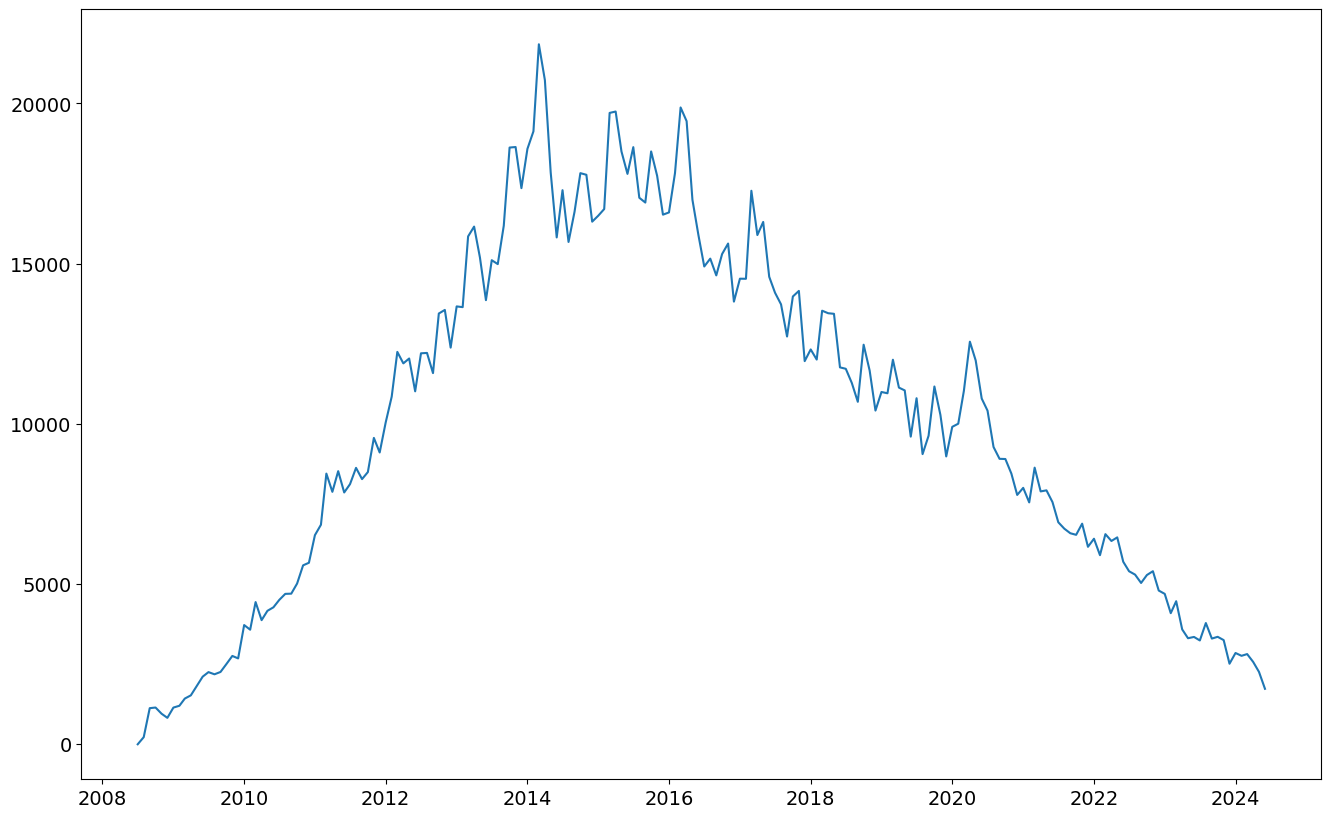

In [55]:
plt.figure(figsize=(16,10))#allows us to resize the chart
plt.xticks(fontsize=14)#configure x-axis
plt.yticks(fontsize=14)#configure y-axis
plt.plot(reshaped_df.index, reshaped_df.java)

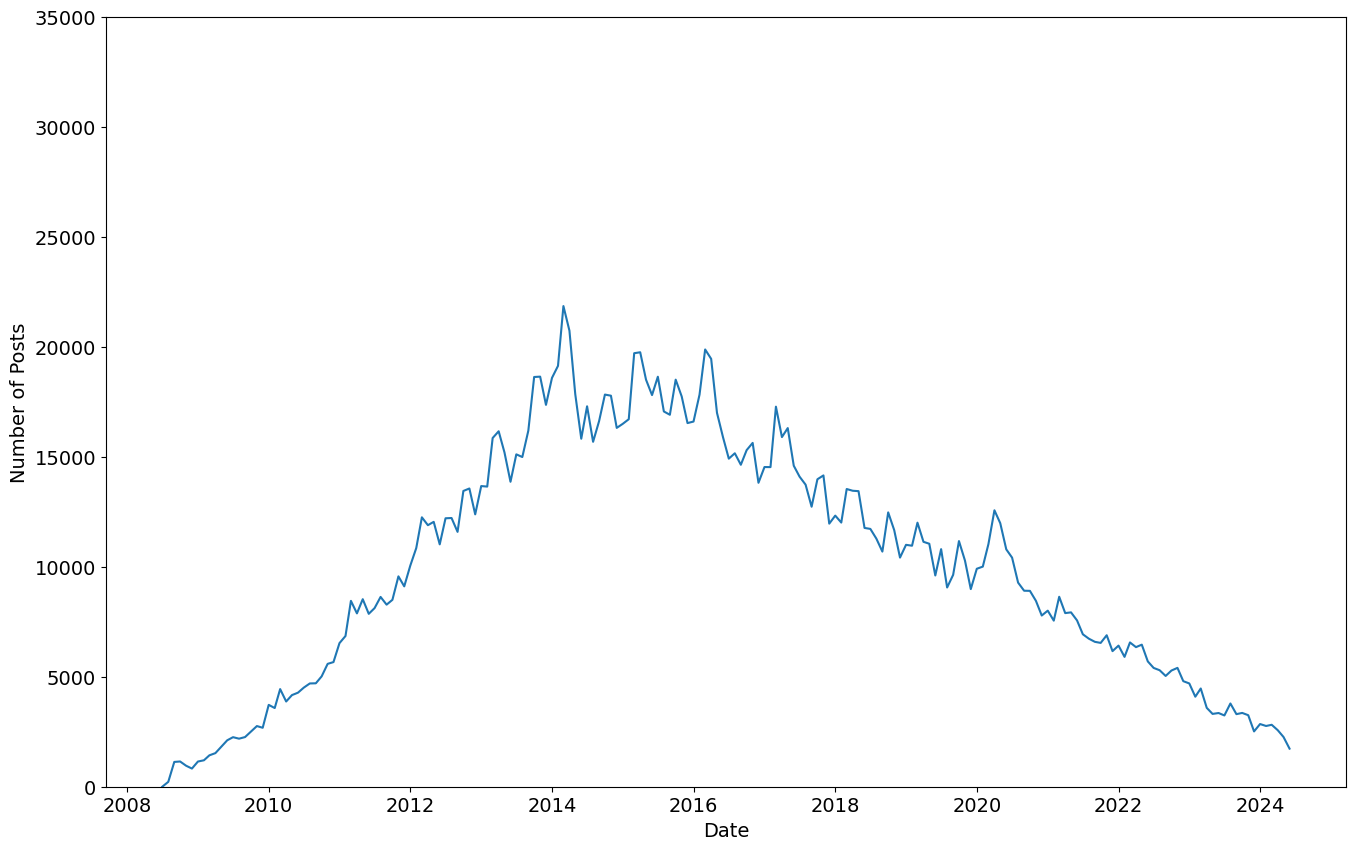

In [59]:
plt.figure(figsize=(16,10))#allows us to resize the chart
plt.xticks(fontsize=14)#configure x-axis
plt.yticks(fontsize=14)#configure y-axis
plt.xlabel('Date', fontsize=14)#Label the x-axis
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

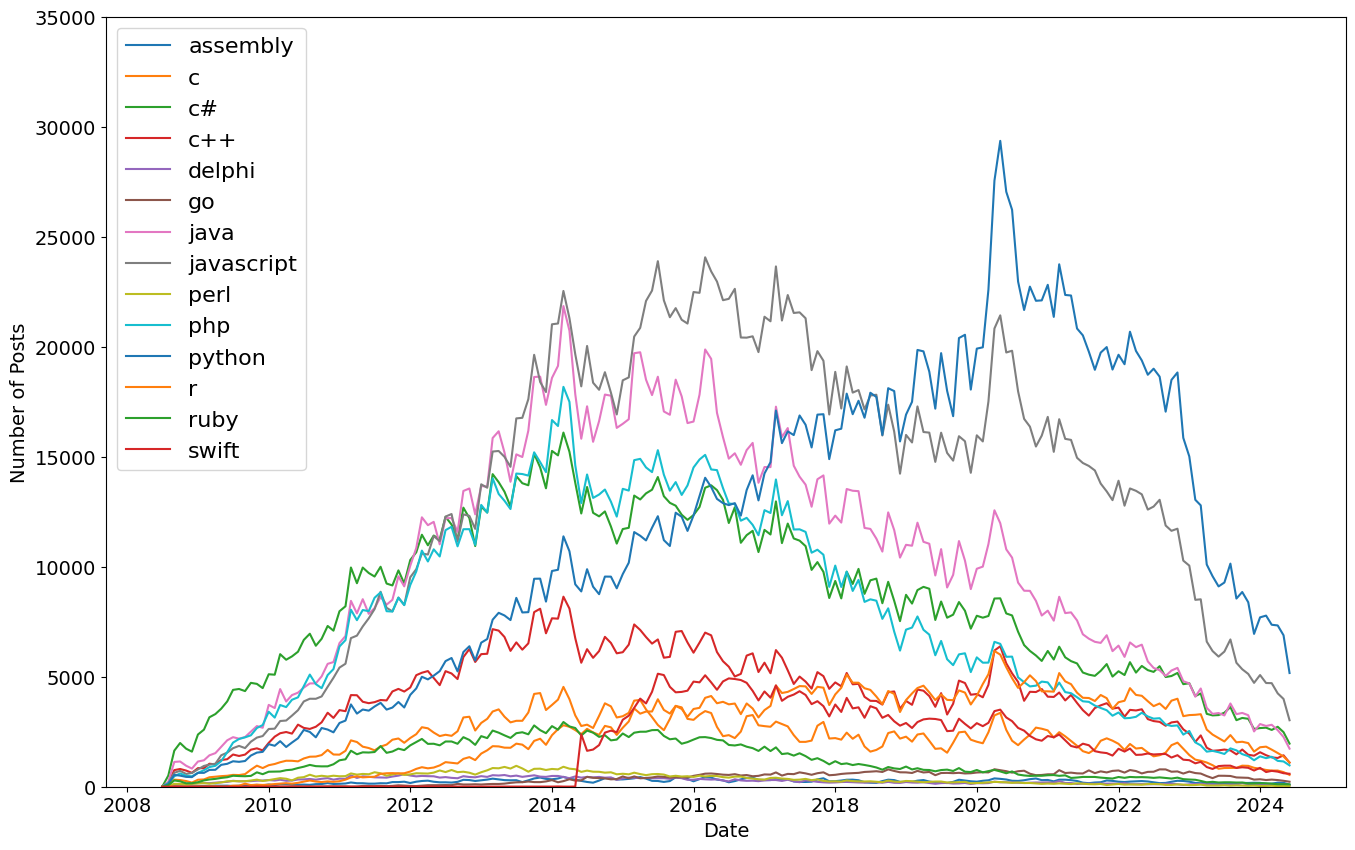

In [68]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python) or
# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.python)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)

plt.legend(fontsize=16)#Allows you to see what each line represents

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [76]:
roll_df = reshaped_df.rolling(window=9).mean()

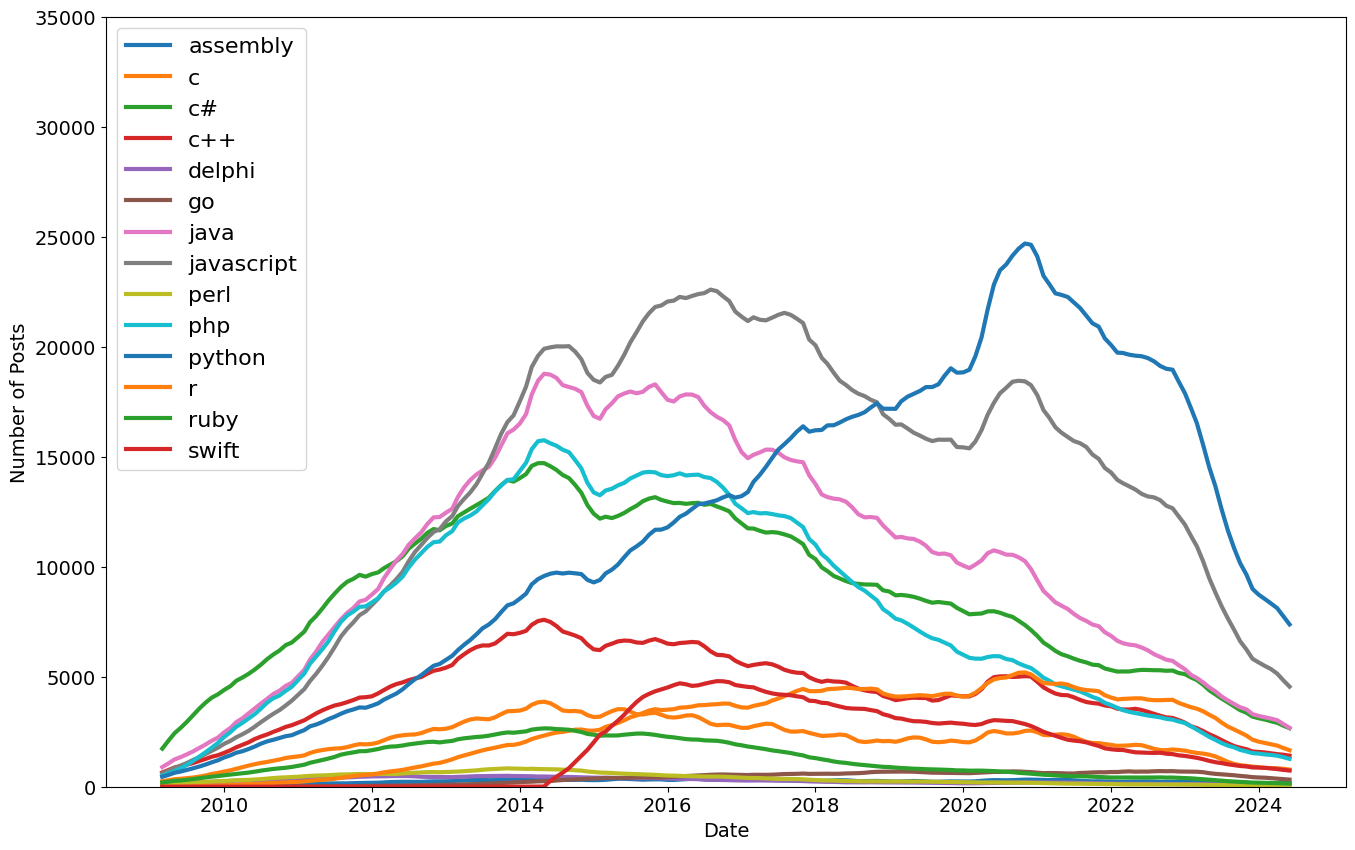

In [77]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)